# Relationship between model complexity and generalization performance exploration (Underfitting and Overfitting)
simple generation of arbitrary data points

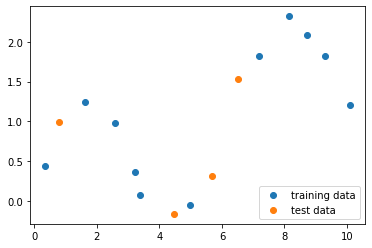

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


np.random.seed(0)
n = 15
x = np.linspace(0,10,n) + np.random.randn(n)/5
y = np.sin(x)+x/6 + np.random.randn(n)/10


X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0)

def plot_points():
    %matplotlib inline

    plt.figure()
    plt.scatter(X_train, y_train, label='training data')
    plt.scatter(X_test, y_test, label='test data')
    plt.legend(loc=4);

plot_points()

### Function that fits a polynomial LinearRegression model on the *training data* `X_train` for degrees 1, 3, 6, and 9
For each model, 100 predicted values are found over the interval x = 0 to 10 (e.g. `np.linspace(0,10,100)`) and store this in a numpy array. The first row of this array correspond to the output from the model trained on degree 1, the second row degree 3, the third row degree 6, and the fourth row degree 9. The code then plots each model curve to see how well it fits the data



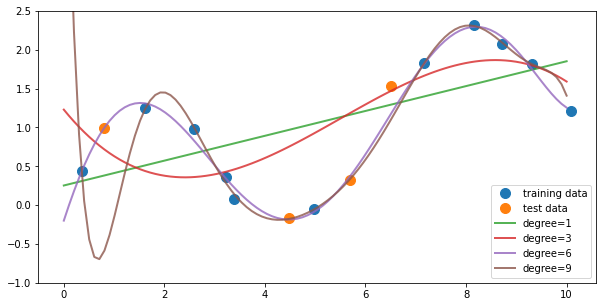

In [19]:
def polynomial_LinearRegression():
    from sklearn.linear_model import LinearRegression
    from sklearn.preprocessing import PolynomialFeatures
    
    degree_predictions = np.zeros((4,100))

    # first model: degrees = 1
    poly_dg1 = PolynomialFeatures(degree=1)
    X_poly_deg1 = poly_dg1.fit_transform(x.reshape(-1, 1))
    X_train, X_test, y_train, y_test = train_test_split(X_poly_deg1, y, random_state = 0)
    poly_linreg_dg1 = LinearRegression().fit(X_train, y_train)
    to_predict = poly_dg1.fit_transform(np.linspace(0,10,100).reshape(-1, 1))
    degree_predictions[0,::] = poly_linreg_dg1.predict(to_predict)
    
    # model: degrees = 3
    poly_dg3 = PolynomialFeatures(degree=3)
    X_poly_deg3 = poly_dg3.fit_transform(x.reshape(-1, 1))
    X_train, X_test, y_train, y_test = train_test_split(X_poly_deg3, y, random_state = 0)
    poly_linreg_dg3 = LinearRegression().fit(X_train, y_train)
    to_predict = poly_dg3.fit_transform(np.linspace(0,10,100).reshape(-1, 1))
    degree_predictions[1,::] = poly_linreg_dg3.predict(to_predict)
    
    # model: degrees = 6
    poly_dg6 = PolynomialFeatures(degree=6)
    X_poly_deg6 = poly_dg6.fit_transform(x.reshape(-1, 1))
    X_train, X_test, y_train, y_test = train_test_split(X_poly_deg6, y, random_state = 0)
    poly_linreg_dg6 = LinearRegression().fit(X_train, y_train)
    to_predict = poly_dg6.fit_transform(np.linspace(0,10,100).reshape(-1, 1))
    degree_predictions[2,::] = poly_linreg_dg6.predict(to_predict)
    
    # model: degrees = 9
    poly_dg9 = PolynomialFeatures(degree=9)
    X_poly_deg9 = poly_dg9.fit_transform(x.reshape(-1, 1))
    X_train, X_test, y_train, y_test = train_test_split(X_poly_deg9, y, random_state = 0)
    poly_linreg_dg9 = LinearRegression().fit(X_train, y_train)
    to_predict = poly_dg9.fit_transform(np.linspace(0,10,100).reshape(-1, 1))
    degree_predictions[3,::] = poly_linreg_dg9.predict(to_predict)
    
 
    return degree_predictions

def plot(degree_predictions):
    plt.figure(figsize=(10,5))
    plt.plot(X_train, y_train, 'o', label='training data', markersize=10)
    plt.plot(X_test, y_test, 'o', label='test data', markersize=10)
    for i,degree in enumerate([1,3,6,9]):
        plt.plot(np.linspace(0,10,100), degree_predictions[i], alpha=0.8, lw=2, label='degree={}'.format(degree))
    plt.ylim(-1,2.5)
    plt.legend(loc=4)

plot_one(answer_one())
 



### $R^2$ (coefficient of determination) for each model on the training data as well as the the test data


In [37]:
def r2_coefficient():
    from sklearn.linear_model import LinearRegression
    from sklearn.preprocessing import PolynomialFeatures
    from sklearn.metrics import r2_score

    r2_train = np.array([])
    r2_test = np.array([])
    
    for i in range(0, 10):
        poly = PolynomialFeatures(degree=i)
        X_poly = poly.fit_transform(x.reshape(-1, 1))
        X_train, X_test, y_train, y_test = train_test_split(X_poly, y,random_state = 0)
        poly_linreg = LinearRegression().fit(X_train, y_train)
        
        r2_train = np.append(r2_train, poly_linreg.score(X_train, y_train))
        r2_test = np.append(r2_test, poly_linreg.score(X_test, y_test))
        
    return (r2_train, r2_test)
     

In [38]:
r2_train, r2_test = r2_coefficient()

for i in range(0, 10):
    print('r2 coefficient for Linear regression model with degree {} (train set): {:.3f}'.format(i, r2_train[i]))
    print('r2 coefficient for Linear regression model with degree {} (test set): {:.3f}'.format(i, r2_test[i]))
    print('---------------------------------------------------------------------------------')
    

r2 coefficient for Linear regression model with degree 0 (train set): 0.000
r2 coefficient for Linear regression model with degree 0 (test set): -0.478
---------------------------------------------------------------------------------
r2 coefficient for Linear regression model with degree 1 (train set): 0.429
r2 coefficient for Linear regression model with degree 1 (test set): -0.452
---------------------------------------------------------------------------------
r2 coefficient for Linear regression model with degree 2 (train set): 0.451
r2 coefficient for Linear regression model with degree 2 (test set): -0.069
---------------------------------------------------------------------------------
r2 coefficient for Linear regression model with degree 3 (train set): 0.587
r2 coefficient for Linear regression model with degree 3 (test set): 0.005
---------------------------------------------------------------------------------
r2 coefficient for Linear regression model with degree 4 (train s

### Underfitting and Overfitting models


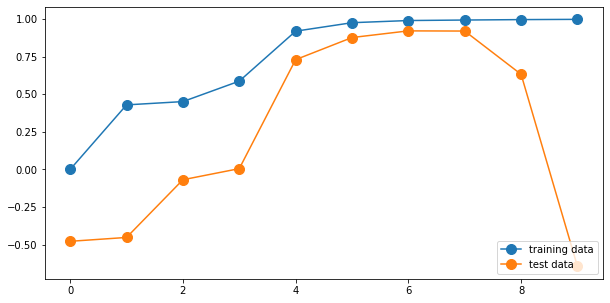

In [39]:
def plot():
    (r2_train, r2_test) = r2_coefficient()
    plt.figure(figsize=(10,5))
    plt.plot(range(0, 10), r2_train, 'o-', label='training data', markersize=10)
    plt.plot(range(0, 10), r2_test, 'o-', label='test data', markersize=10)
    plt.legend(loc=4)
    

plot()


### Based on the plot:<br>
### Model underfitting: 0 degrees <br>
### Model overfitting: 8 degrees <br>
### Good generalization model: 6 degrees <br>